In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
#To install packages needed to run this code, use: pip install -r requirements.txt
from ucimlrepo import fetch_ucirepo 
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# fetch dataset 
data = fetch_ucirepo(id=45)

#Convert to binary classification (no heart disease vs heart disease)
y = data.data.targets.to_numpy().reshape(-1) 
y = np.clip(y, 0, 1)  

#Impute missing values with mode
df = data.data.features
df = df.fillna(df.mode().iloc[0])

#Get feature values  
X = df.to_numpy() 

#Reencode categorical variables
categorical_columns       = ['cp','restecg']
categorical_indices       = [i for i,c in enumerate(df.columns) if c in categorical_columns]
non_categorical_indices   = [i for i,c in enumerate(df.columns) if c not in categorical_columns]
encoder                   = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
Xonehot                   = encoder.fit_transform(X[:,categorical_indices])
Xnew                      = np.hstack([X[:,non_categorical_indices],Xonehot])

#Split into train and test sets
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(Xnew, y, test_size=0.20, random_state=589,stratify=y)

#Standardize features
scaler = StandardScaler()
Xtrain= scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


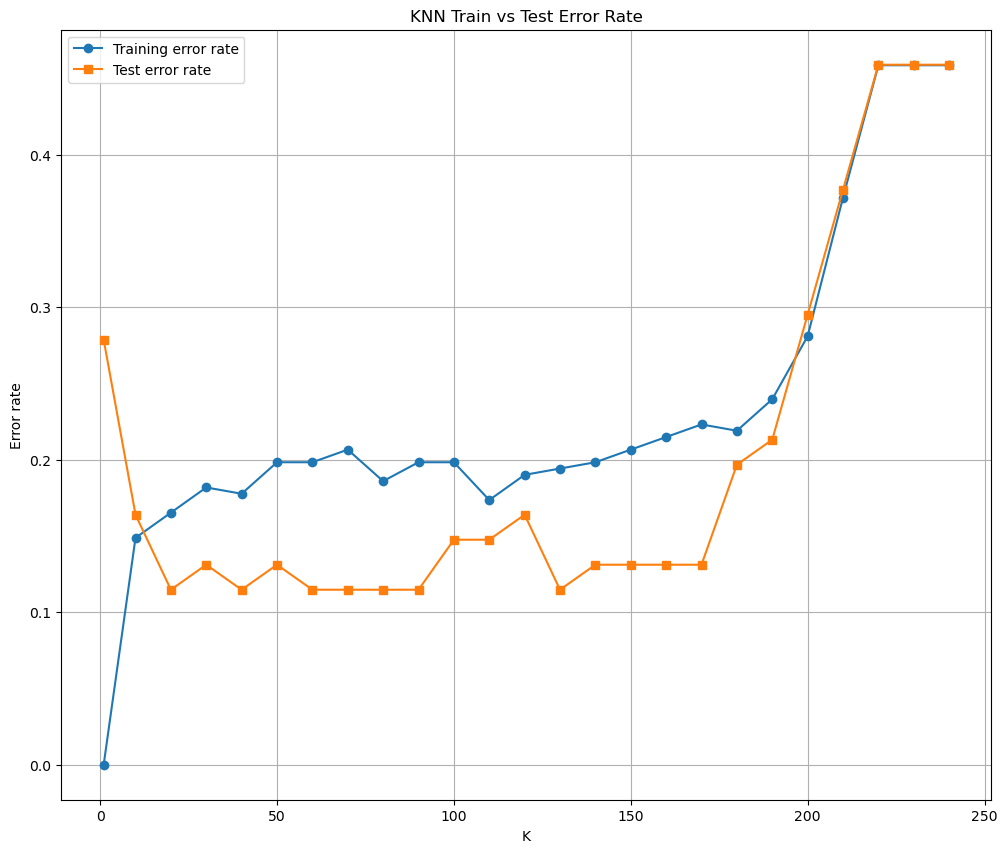

In [10]:
import matplotlib.pyplot as plt

max_k = (Xtrain.shape[0] // 10) * 10  
k_values = [1] + list(range(10, max_k+1, 10))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(Xtrain, ytrain)
    ytrain_pred = knn.predict(Xtrain)
    ytest_pred  = knn.predict(Xtest)

    # Error rates
    train_error = np.mean(ytrain_pred != ytrain)
    test_error  = np.mean(ytest_pred != ytest)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot
plt.figure(figsize=(12,10))
plt.plot(k_values, train_errors, marker="o", label="Training error rate")
plt.plot(k_values, test_errors, marker="s", label="Test error rate")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.title("KNN Train vs Test Error Rate")
plt.legend()
plt.grid(True)
plt.show()